<a href="https://colab.research.google.com/github/chaurasiauttkarsh/Deep-Learning-Tensorflow-Projects/blob/master/Complex_Happy_or_Sad_Classification_ImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the data**

```
Happy or Sad Dataset
```



In [2]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

--2020-03-17 19:49:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2020-03-17 19:49:16 (154 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]





```
Extracting the data into /temp folder
```



In [0]:
import os
import zipfile

local_zip = '/tmp/happy-or-sad.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/happy-or-sad')

zip_ref.close()



```
Directories of the data
```



In [0]:
# Directory with our training Happy pictures
happy_dir = os.path.join('/tmp/happy-or-sad/happy')
train_happy_names = os.listdir(happy_dir)

# Directory with our training human pictures
sad_dir = os.path.join('/tmp/happy-or-sad/sad')
train_sad_names = os.listdir(sad_dir)



```
Checking the Number of Images
```



In [7]:
print('total happy images:', len(os.listdir(happy_dir)))
print('total sad images:', len(os.listdir(sad_dir)))

total happy images: 40
total sad images: 40




```
Visualising the data
```



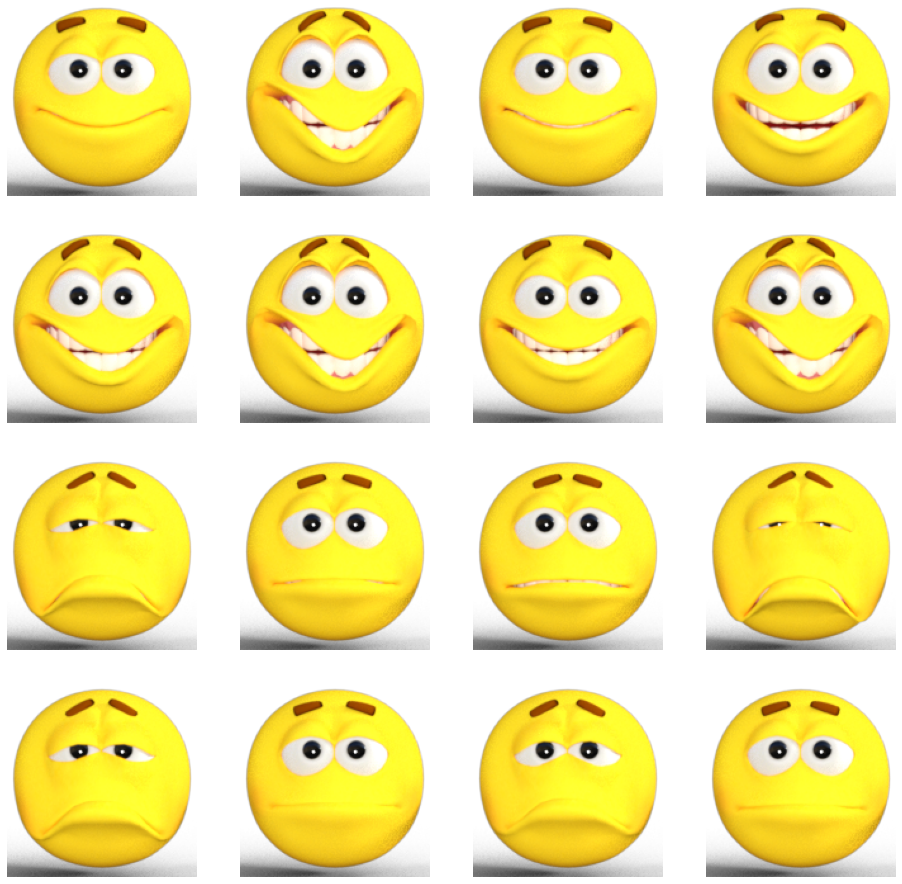

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
happy_pix = [os.path.join(happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
sad_pix = [os.path.join(sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(happy_pix+sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Building the model**

**Importing the libraries**

In [0]:
import tensorflow as tf

**Defining the model**

In [12]:
model = tf.keras.models.Sequential([
                                    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
                                    # This is the first convolution
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The second convolution
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # The third convolution
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # Flatten the results to feed into a DNN
                                    tf.keras.layers.Flatten(),
                                    # 256 neuron hidden layer
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])
    

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________

**Compiling the model**

In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**Preprocessing using ImageDataGenerator**

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory('/tmp/happy-or-sad', # This is the source directory for training images
                                                   target_size=(150, 150), # All images will be resized to 150x150
                                                   batch_size=40, # Since we use binary_crossentropy loss, we need binary labels
                                                   class_mode='binary')


Found 80 images belonging to 2 classes.


**Training the model**

In [15]:
DESIRED_ACCURACY = 0.999

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > DESIRED_ACCURACY):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

history = model.fit_generator(
      train_generator,
      steps_per_epoch=2,  
      epochs=30,
      verbose=1,
      callbacks=[callbacks])

Epoch 1/30
2/2 [==============================] - 3s 1s/step - loss: 2.9067 - acc: 0.5000
Epoch 2/30
2/2 [==============================] - 2s 773ms/step - loss: 1.5064 - acc: 0.5000
Epoch 3/30
2/2 [==============================] - 2s 776ms/step - loss: 0.6676 - acc: 0.5000
Epoch 4/30
2/2 [==============================] - 2s 776ms/step - loss: 0.6223 - acc: 0.7625
Epoch 5/30
2/2 [==============================] - 2s 776ms/step - loss: 0.5708 - acc: 0.7875
Epoch 6/30
2/2 [==============================] - 2s 773ms/step - loss: 0.4847 - acc: 0.8000
Epoch 7/30
2/2 [==============================] - 2s 790ms/step - loss: 0.3716 - acc: 0.8875
Epoch 8/30
2/2 [==============================] - 2s 775ms/step - loss: 0.2314 - acc: 0.9375
Epoch 9/30
2/2 [==============================] - 2s 780ms/step - loss: 0.1710 - acc: 0.9500
Epoch 10/30
2/2 [==============================] - 2s 777ms/step - loss: 0.3739 - acc: 0.8125
Epoch 11/30
2/2 [==============================] - 2s 787ms/step - loss: